In [2]:
import tensorflow as tf

## wineresearch에서 tensorflow 다운
1. cd study 
2. conda activate tensorflow
3. jupyter notebook  type 후 접속 
4. wineresearch 형 python file에서 실행

https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/


In [3]:
tf.__version__

'1.15.0'

In [14]:
import numpy as np

In [3]:
!pip install pandas

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('winequality-red.csv',';')

/Applications/Utilities/anaconda3/envs/wineregression/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df['sulphates' + 'MAD'] = abs(df['sulphates'] -df['sulphates'].median())

In [5]:
df['quality'].mean()

5.6360225140712945

In [6]:
df['sulphates'].value_counts()

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64

In [8]:
df['sulphates'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [9]:
df['pH'].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64

In [10]:
df['pH'+'MAD'] = abs(df['pH'] - df['pH'].median())

In [11]:
df['pH'].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64

In [12]:
def outlier_iqr(data):
    q1, q3 = np.percentile(data, [25,75])
    
    iqr = q3 - q1 
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    return np.where((data > upper_bound)|(data < lower_bound))

In [34]:
pH_outlier_index = outlier_iqr(df['pH'])[0]
sulphates_outlier_index = outlier_iqr(df['sulphates'])[0]
alcohol_outlier_index = outlier_iqr(df['alcohol'])[0]

In [35]:
total_outlier_index = np.concatenate((pH_outlier_index, sulphates_outlier_index, alcohol_outlier_index),axis=None)

In [36]:
Not_outlier = []

for i in df.index:
    if i not in total_outlier_index:
        Not_outlier.append(i)

In [37]:
len(Not_outlier)

1498

In [38]:
Not_outlier[-1]

1598

In [39]:
x_clean = df.loc[Not_outlier]
x_clean = x_clean.reset_index(drop=True)
print(len(x_clean))

1498


In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sulphatesMAD
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.06
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.06
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.03
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.04
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.04
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.14
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.13
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
winequality = open('winequality.names','r',encoding='UTF8') # encoding을 꼭 넣어줘야 list에서 for문으로 잘 출력한다.
print(winequality)

<_io.TextIOWrapper name='winequality.names' mode='r' encoding='UTF8'>


In [10]:
winequalitylist = winequality.readlines()
for i in winequalitylist:
    print(i)

Citation Request:

  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 

  Please include this citation if you plan to use this database:



  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

  Modeling wine preferences by data mining from physicochemical properties.

  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.



  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016

                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf

                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib



1. Title: Wine Quality 



2. Sources

   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

   

3. Past Usage:



  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

  Modeling wine preferences by data mining from physicochemical properties.

  In Decision Support Systems, Elsevier, 47(

In [11]:
red_df = pd.DataFrame(df)

In [14]:
red_df["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [15]:
red_df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
labels = red_df.columns

In [36]:
x = red_df[['sulphates','alcohol','pH']] # 상관계수 높은 경우 svr : 0.29

In [31]:
y = red_df[["quality"]]

In [17]:
labels

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
!pip install sklearn

     |████████████████████████████████| 7.8 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 33.0 MB 142 kB/s  eta 0:00:01    |███████▌                        | 7.7 MB 34.2 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 31.2 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=21861d3cee9f8f6e60827cc479aeaf9280217af0d264c31cd5ce95e225a7cb99
  Stored in directory: /Users/ihyeonjun/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [26]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(x)
Y = sc_Y.fit_transform(y)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [38]:
from sklearn import svm

In [39]:
clf = svm.SVR(kernel='linear')
clf.fit(x_train, y_train.values.ravel())
y_pred = clf.predict(x_test)
r_2 = clf.score(x_test, y_test)

In [40]:
r_2

0.30137681669536553

In [30]:
!pip install matplotlib.

     |████████████████████████████████| 7.3 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 28.4 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 899 kB 14.0 MB/s eta 0:00:01     |█████████████████████▉          | 614 kB 14.0 MB/s eta 0:00:01


In [8]:
import matplotlib.pyplot as plt #pyplot을 import 해야 scatter쓴다.

In [39]:
red_df.corrwith(df['quality'], method='spearman').sort_values()

volatile acidity       -0.380647
total sulfur dioxide   -0.196735
chlorides              -0.189922
density                -0.177074
free sulfur dioxide    -0.056901
pH                     -0.043672
residual sugar          0.032048
fixed acidity           0.114084
citric acid             0.213481
sulphates               0.377060
alcohol                 0.478532
quality                 1.000000
dtype: float64

In [57]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()

fixed acidity


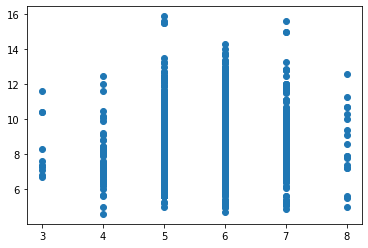

volatile acidity


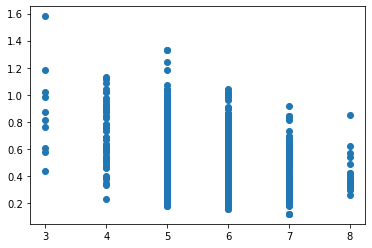

citric acid


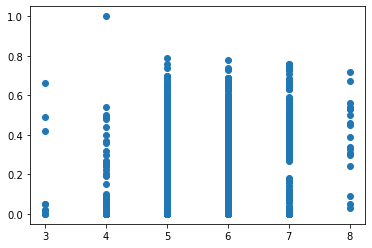

residual sugar


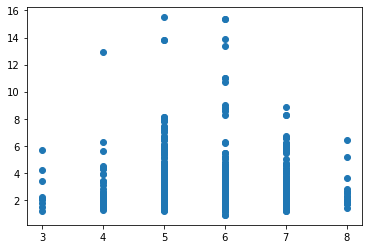

chlorides


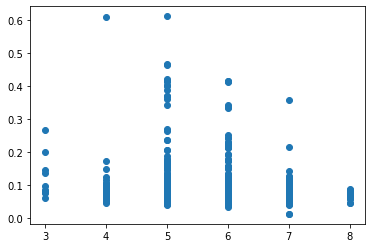

free sulfur dioxide


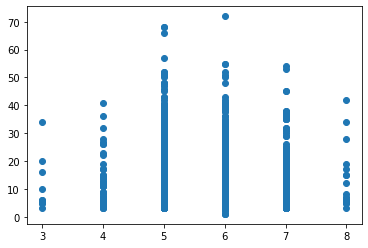

total sulfur dioxide


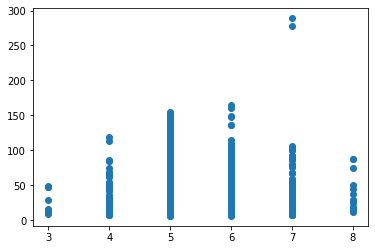

density


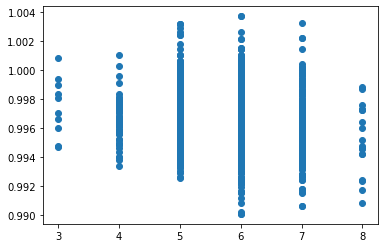

pH


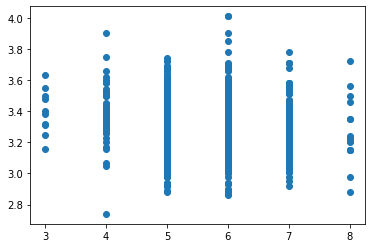

sulphates


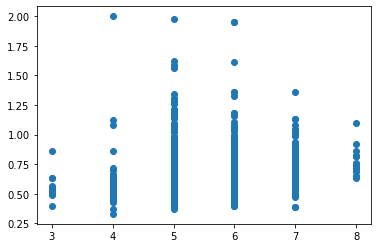

alcohol


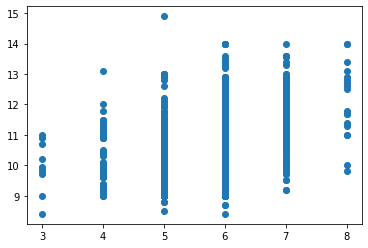

quality


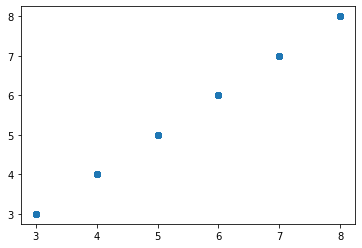

In [102]:
for column in labels:
    print(column)
    plt.scatter(red_df[['quality']],red_df[[column]])
    plt.show()

In [93]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [98]:
red_df_duplicate_dropped = df.copy()
red_df_duplicate_dropped.drop_duplicates(subset=None, inplace=True)

In [99]:
red_df_duplicate_dropped.shape #duplicated value exists -> copy를 통해 중복 값 있는지 체크할 수 있다.

(1359, 12)

In [100]:
red_df_train, red_df_test = train_test_split(red_df_duplicate_dropped, train_size=0.7, test_size=0.3, random_state=100)

In [101]:
red_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 31 to 926
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         951 non-null    float64
 1   volatile acidity      951 non-null    float64
 2   citric acid           951 non-null    float64
 3   residual sugar        951 non-null    float64
 4   chlorides             951 non-null    float64
 5   free sulfur dioxide   951 non-null    float64
 6   total sulfur dioxide  951 non-null    float64
 7   density               951 non-null    float64
 8   pH                    951 non-null    float64
 9   sulphates             951 non-null    float64
 10  alcohol               951 non-null    float64
 11  quality               951 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 96.6 KB


In [105]:
!pip install seaborn

     |████████████████████████████████| 292 kB 11.4 MB/s eta 0:00:01


In [7]:
import seaborn as sns

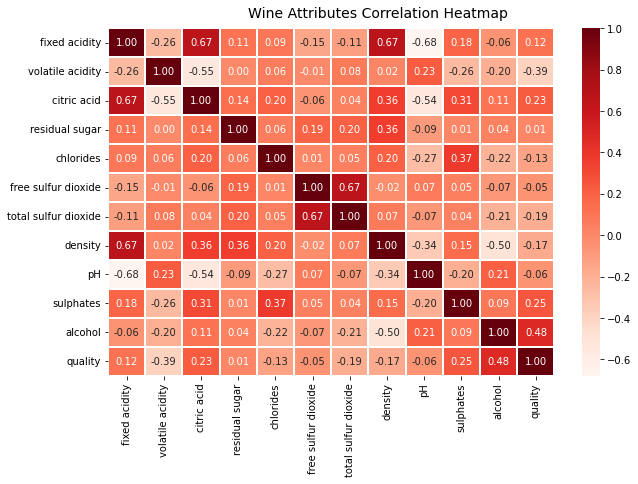

In [107]:
f, ax = plt.subplots(figsize=(10, 6))
corr = red_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

In [120]:
#https://www.kaggle.com/code/minnieliang/red-wine-quality-multiple-linear-regression/comments
#https://coalastudy.com:8181/api/static/user/3umt17jvg5y.html

In [111]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)

In [137]:
from sklearn.model_selection import cross_val_score

In [138]:
from sklearn.model_selection import KFold

In [128]:
forest.fit(x_train, y_train)

/Applications/Utilities/anaconda3/envs/wineregression/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [129]:
print('training accuracy:', forest.score(x_train, y_train)) #상관계수 기반 결정계수값 

training accuracy: 0.9138900618172958


In [32]:
#svc svr challenge

model = svm.SVR()
model.fit(x_train, y_train)
print('training accuracy:', model.score(x_train, y_train))

training accuracy: 0.3753859899917735


/Applications/Utilities/anaconda3/envs/wineregression/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
print('test set accuracy:', forest.score(x_test, y_test))
y_predict = forest.predict(x_test)

test set accuracy: 0.20777284902979554


In [132]:
comparison = pd.DataFrame(y_test)

comparison['expect'] = y_predict
comparison.head()

,quality,expect
1109,6,5.29
1032,5,5.39
1002,7,6.95
487,6,5.65
979,5,5.26


In [33]:
#svc svr challenge
predict_train = model.predict(x_train)

In [34]:
predict_test = model.predict(x_test)

In [41]:
def my_score(result, answer):
    comparison = pd.DataFrame(answer)
    
    comparison['prediction'] = result
    comparison = round(comparison)
    evaluation = (comparison['quality'] == comparison['prediction'])
    success = (evaluation == True).sum()
    failure = (evaluation == False).sum()
    
    return success / (success+failure)
print('(category) train set accuracy', my_score(predict_train, y_train))
print('(category) test set accuracy', my_score(predict_test, y_test))

(category) train set accuracy 0.5853440571939231
(category) test set accuracy 0.6104166666666667


In [42]:
predict_train_forest = forest.predict(x_train)
predict_test_forest = forest.predict(x_test)
print('(category) train set accuracy', my_score(predict_train_forest, y_train))
print('(category) test set accuracy', my_score(predict_test_forest, y_test))

NameError: name 'forest' is not defined

In [ ]:
kfold = KFold(n_splits=6, shuffle= True, random_state= 0) # kfold -- cross validation 
scores = cross_val_score(model, )

In [1]:
from sklearn import model_selection

In [2]:
import sys 
from sklearn import svm, metrics
import random

In [14]:
model = svm.SVR()

In [43]:
scores = model_selection.cross_val_score(model, x,y, cv=3)
print('cross-val-score\n{}'.format(scores))
print("Mean of cross-val-score\n{}".format(scores.mean()))

/Applications/Utilities/anaconda3/envs/wineregression/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/Utilities/anaconda3/envs/wineregression/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cross-val-score
[0.23287375 0.28487217 0.21544591]
Mean of cross-val-score
0.2443972754732636


/Applications/Utilities/anaconda3/envs/wineregression/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fixed acidity


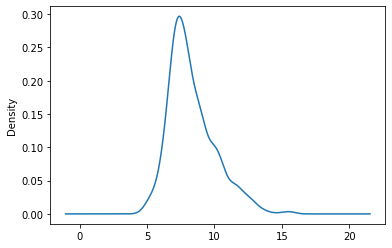

volatile acidity


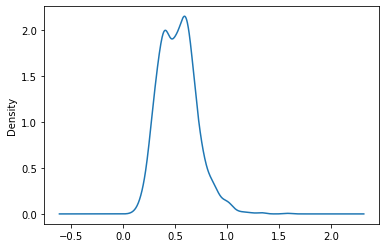

citric acid


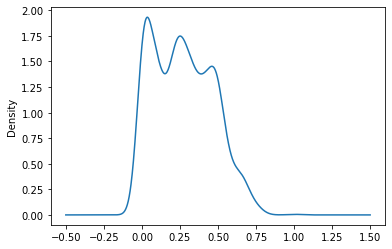

residual sugar


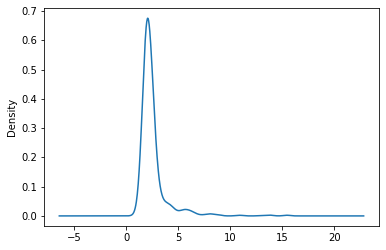

chlorides


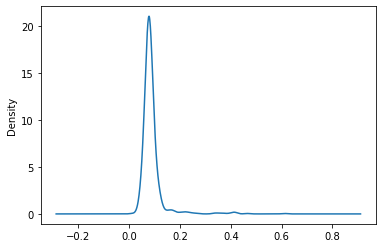

free sulfur dioxide


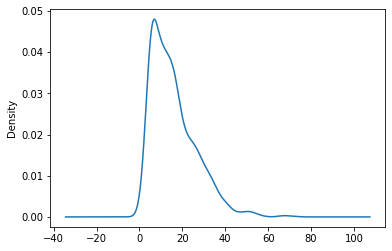

total sulfur dioxide


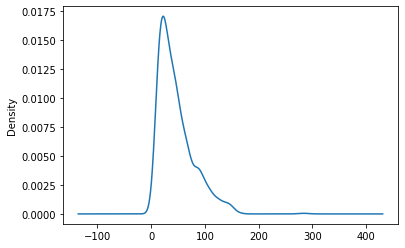

density


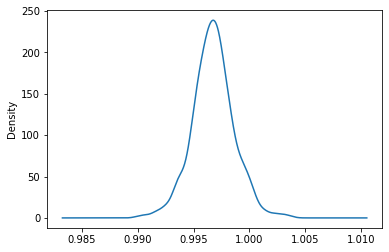

pH


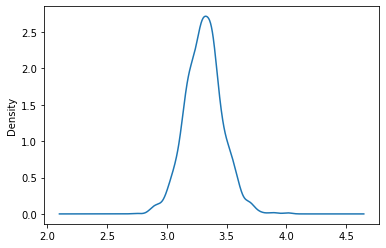

sulphates


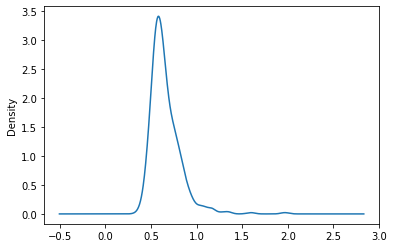

alcohol


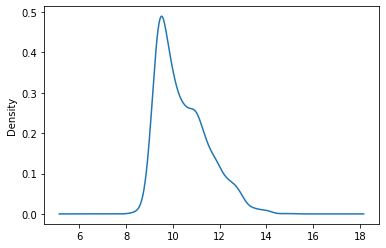

quality


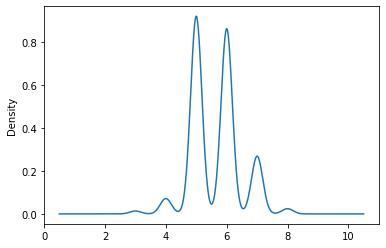

In [21]:
for label in labels:
    print(label)
    df[label].plot(kind="density")
    plt.show()

In [23]:
sc_X = StandardScaler()
sc_Y = StandardScaler()

In [28]:
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(px_test)

In [44]:
x.shape

(1599, 3)

In [45]:
x.describe()

,sulphates,alcohol,pH
count,1599.000000,1599.000000,1599.000000
mean,0.658149,10.422983,3.311113
std,0.169507,1.065668,0.154386
min,0.330000,8.400000,2.740000
25%,0.550000,9.500000,3.210000
50%,0.620000,10.200000,3.310000
75%,0.730000,11.100000,3.400000
max,2.000000,14.900000,4.010000


In [50]:
x.loc[x['alcohol'] == 8.4]

,sulphates,alcohol,pH
517,0.63,8.4,3.16
544,0.79,8.4,2.86


KeyError: 544

In [3]:
df2 = pd.read_csv('winequality-white.csv',';')

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df2.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [5]:
df2.shape

(4898, 12)

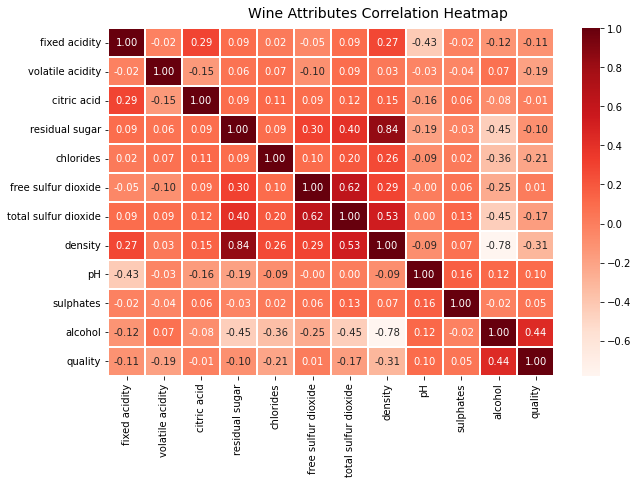

In [9]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df2.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64